# 80% Work Frequency Analysis and Visualization

## Basic look at vocab lists

In [1]:
from find_path import find_dir
import os
import pandas as pd

frankenstein = []
alice = []
shakespeare = []
two_cities = []
gatsby = []
pride = []

titles = {"Frankenstein": frankenstein, "Alice": alice, "Pride": pride, "Shakespeare": shakespeare, 
         "Two_Cities": two_cities, "Gatsby": gatsby}

def find_path(title):
    return f"{find_dir(title)}/{title}_jupyter.csv"

def csv_to_lst(path):
    df = pd.read_csv(path,  names=["Index", "Word"], index_col= "Index", skiprows=[0])
    return list(df["Word"])
    
for title, value in titles.items():
    path = find_path(title)
    value += csv_to_lst(path)

classic = two_cities[:]

In [2]:
for x in [alice, frankenstein, pride, shakespeare, gatsby]:
    classic = classic + x
print(f'Total words in all text vocab lists: {len(classic)}\n*Not including modern (Natural Language Corpus Data: n-gram) words')

Total words in all text vocab lists: 1983
*Not including modern (Natural Language Corpus Data: n-gram) words


In [3]:
classic_set = set(classic)
print(f'Total unique words in all text vocab lists: {len(classic_set)}\n*Not including modern (Natural Language Corpus Data: n-gram) words')

Total unique words in all text vocab lists: 1154
*Not including modern (Natural Language Corpus Data: n-gram) words


In [4]:
n_gram = "Ngram"
n_gram = f"{find_dir(n_gram)}/edited_n_gram.csv"
df = pd.read_csv(path,  names=["Index", "Word", "Count"], index_col= "Index", skiprows=[0])
n_gram = list(df["Word"])

In [5]:
print(f'Total unique words needed for over 80% comprehension in all texts (n-gram list included): {len(classic_set) + len(n_gram)}')

Total unique words needed for over 80% comprehension in all texts (n-gram list included): 1489


In [6]:
print(f'Words that appear in all vocab lists (but not in n-gram list): \n{list(set(shakespeare) & set(gatsby)  & set(frankenstein) & set(alice) & set(two_cities) & set(pride))}')

Words that appear in all vocab lists (but not in n-gram list): 
['Eyes', 'Spoke', 'Door', 'Went', 'Came', 'Sister', 'Gone', 'Rather', 'Speak', 'Gave', 'Cry', 'Hear', 'Nothing', 'Poor', 'Took', 'Knew', 'Heard', 'Saw']


## What can a Pandas DataFrame tell us about the vocab lists?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
texts = {"Text": ["Alice's Adventures in Wonderland", "Frankenstein", "The Great Gatsby", "Pride and Prejudice", "Shakespearean Cannon", "A Tale of Two Cities"],
        "Hundred Comprisal %":    [61.04, 55.33, 53.87, 59.80, 52.62, 55.64],
        "Hundred Overall %":      [3.92,  1.43,  1.67,  1.60,  0.39,  1.03],
        "~80% Comprehension":     [350,   900,   725,   525,   1025,   750],
        "Actual Comprehension %": [80.29, 80.13, 80.19, 80.54, 80.21, 80.24],
        "Vocab List":             [101,   542,   335,   221,   434,   350],
        "Overall Word Count":     [27675, 75265, 49921, 122757, 971373, 138015] }
#print(texts)
df = pd.DataFrame(texts)
df

,Text,Hundred Comprisal %,Hundred Overall %,~80% Comprehension,Actual Comprehension %,Vocab List,Overall Word Count
0,Alice's Adventures in Wonderland,61.04,3.92,350,80.29,101,27675
1,Frankenstein,55.33,1.43,900,80.13,542,75265
2,The Great Gatsby,53.87,1.67,725,80.19,335,49921
3,Pride and Prejudice,59.80,1.60,525,80.54,221,122757
4,Shakespearean Cannon,52.62,0.39,1025,80.21,434,971373
5,A Tale of Two Cities,55.64,1.03,750,80.24,350,138015


In [9]:
df.describe()

,Hundred Comprisal %,Hundred Overall %,~80% Comprehension,Actual Comprehension %,Vocab List,Overall Word Count
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
mean,56.383333,1.673333,712.500000,80.266667,330.50000,230834.333333
std,3.331658,1.197742,245.331409,0.144037,155.24529,365211.944444
min,52.620000,0.390000,350.000000,80.130000,101.00000,27675.000000
25%,54.235000,1.130000,575.000000,80.195000,249.50000,56257.000000
50%,55.485000,1.515000,737.500000,80.225000,342.50000,99011.000000
75%,58.760000,1.652500,862.500000,80.277500,413.00000,134200.500000
max,61.040000,3.920000,1025.000000,80.540000,542.00000,971373.000000


## Vocab list data in graphs

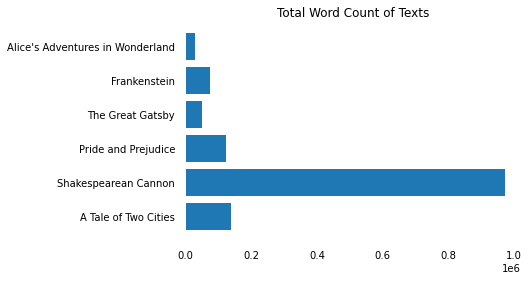

In [10]:
plt.figure()
plt.style.use('seaborn-notebook')
plt.barh(df["Text"], df["Overall Word Count"])
plt.title('Total Word Count of Texts')
plt.gca().invert_yaxis()
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

<Figure size 576x396 with 0 Axes>

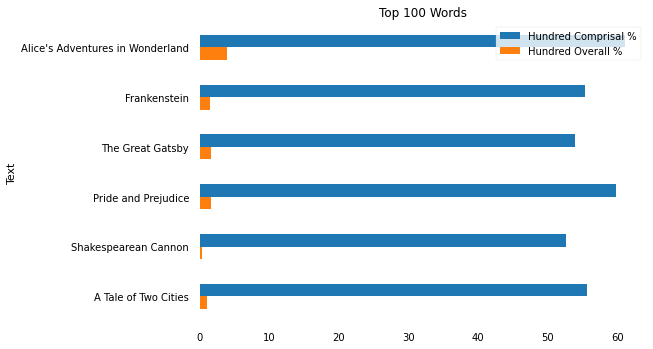

In [11]:
plt.figure()
plt.style.use('seaborn-notebook')
hundred = df.copy()
hundred.drop(["~80% Comprehension", "Actual Comprehension %", "Vocab List", "Overall Word Count"], axis=1, inplace=True)#.setindex("Text")
hundred.set_index("Text", inplace=True)
hundred.plot.barh()
plt.title('Top 100 Words')
plt.gca().invert_yaxis()
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

<Figure size 576x396 with 0 Axes>

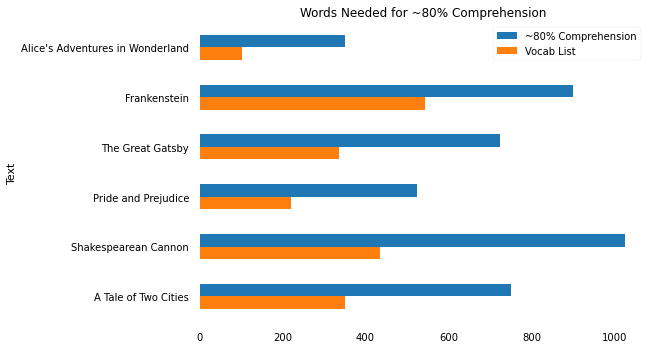

In [12]:
plt.figure()
plt.style.use('seaborn-notebook')
eighty = df.copy()
eighty.drop(["Hundred Comprisal %", "Hundred Overall %", "Overall Word Count", "Actual Comprehension %"], axis=1, inplace=True)#.setindex("Text")
eighty.set_index("Text", inplace=True)
eighty.plot.barh()
plt.title('Words Needed for ~80% Comprehension')
plt.gca().invert_yaxis()
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

## Other things to consider:
 - How would a base vocab list other than Natural Language Corpus Data n-gram change the number of vocab words per book?
 - How easily would this data pipeline transfer to languages other than English?